<a href="https://colab.research.google.com/github/psrathi24/Portfolio_Projects/blob/main/SF_Films_Project_Complete_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given cleaned data, here I will generate insights.

Upload files from "FILES TO INITIALIZE 2"

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

from geopy.distance import geodesic
import folium
from folium.plugins import Search, MarkerCluster
import branca
from shapely.geometry import Point, MultiPoint

In [ ]:
sf_movies_1 = pd.read_csv('sorted_sf_movies_1.csv')
sf_movies_2 = pd.read_csv('sorted_sf_movies_2.csv')
sf_tourist_spots = pd.read_excel('SF Tourist Spots.xlsx')

pd.set_option('display.width', None)

In [ ]:
sf_movies_2['location_cluster'] = sf_movies_2['location_cluster'].astype('int64')
sf_movies_2['release_decade'] = sf_movies_2['release_decade'].astype('int64')

In [ ]:
# Initialize and Map cluster dictionaries:

cluster_dict_1 = {
    -1: "Unclustered Points",
    0: "Treasure Island",
    2: "Ferry Building",
    3: "Market St. area near Duboce Triangle",
    4: "Fort Mason",
    5: "Fisherman’s Wharf",
    6: "Fillmore St. area",
    7: "Golden Gate Bridge",
    8: "Golden Gate Park",
    9: "City Hall area",
    10: "Castro and 19th St.",
    11: "Pier 50",
    12: "Little Italy neighborhood",
    13: "Fairmont Hotel area",
    14: "Union Square area",
    15: "Kansas St. area, near 16th intersection",
    16: "Financial District",
    17: "South of Market",
    18: "Lower Nob Hill"
}

cluster_dict_2 = {
    -1: "Unclustered points",
    1: "Chrissy Field/Fort Point/Presidio",
    2: "Baker Beach/Sea Cliff",
    4: "Inner Richmond, right of California State Route 1",
    5: "Laguna Honda Hospital/Forest Hills MUNI Station",
    6: "Triangle area formed by Ocean Ave, Geneva Ave, Alemany Blvd",
    7: "Pier 96/near Heron’s Head Park",
    8: "Outer Sunset, left of 19th",
    9: "Golden Gate Park, includes bordering streets",
    10: "Inner Sunset, right of 19th",
    11: "Entire Chinatown",
    12: "Innes Ave",
    13: "Illinois St/3rd St bridge area",
    14: "Area surrounding John McLaren Park",
    15: "Golden Gate National Recreation Area/Fort Mason",
    16: "Bay Bridge",
    17: "9 block radius around City Hall",
    18: "Castro St. area, from 16th to 21st St.",
    19: "Area mainly northwest of Francisco Park",
    20: "SF International Airport",
    21: "Treasure Island",
    22: "Yerba Buena Island",
    23: "Point Lobos Ave down to the Cliff House & Sutro Baths",
    24: "Sloat Blvd, from Great Highway to 45th Ave",
    25: "Mount Davidson Park area",
    26: "Urbano Dr area",
    27: "Oracle Park",
    28: "Ocean Beach stretch",
    29: "4 blocks around center of Lombard & Hyde intersection",
    30: "Golden Gate Bridge and Marin Headlands",
    31: "Candlestick Park",
    32: "Alcatraz Island",
    33: "9 blocks surrounding Washington Square Park, including streets",
    34: "Legion of Honor/surrounding area",
    35: "Outer Richmond, left of California State Route 1",
    36: "9 blocks surrounding Huntington Park, including streets",
    37: "Area surrounding 3rd St. going through Bayview District",
    38: "Port of San Francisco and 3rd St area",
    39: "near Ocean Ave going through Balboa Terrace",
    40: "Pier 39-45 = Fisherman’s Wharf area",
    41: "Coit Tower",
    42: "Palace of Fine Arts",
    43: "Marina",
    44: "near/along Lombard Street, just before the famous winding road",
    45: "Presidio Heights neighborhood",
    47: "along Embarcadero + Pier 9-27",
    48: "7 blocks around the block of Castle St",
    49: "Along Columbus, between Northpoint & Lombard",
    50: "Jones to Mason, between Broadway & Vallejo",
    51: "rest of Russian Hill",
    52: "surrounding Colombus, from Kearny to Powell & from Green to Broadway",
    53: "west side of Cow Hollow: from Lyon to Fillmore & Pacific to Union",
    54: "1 block radius around Alta Plaza Park",
    55: "Area surrounding Divisadero and California St. going through Lower Pacific Heights",
    56: "1 block radius around Lafayette Park",
    57: "Rectangle (Broadway, Union St., Webster St., Polk St.)",
    58: "cluster near South end of Columbus, crossing Broadway",
    59: "union square area",
    60: "Area around 24th St. from Folsom St. to Portero Ave",
    61: "Haight St. area",
    62: "Taylor & Jones from Geary to Golden Gate Ave",
    63: "Mission & 20th + surrounding area",
    64: "UN Plaza, Hibernia Bank",
    65: "Mission & Valencia + 21st & 22nd St",
    66: "Market St, from 4th to 5th",
    67: "near Pier 5 & 7",
    68: "area surrounding Duboce Park",
    69: "Alamo Square and surrounding area",
    70: "area along Howard St, from 2nd to 3rd St",
    71: "area around 16th, from Valencia to Guerrero",
    72: "Hall of Justice",
    73: "Mission St., from 1st to Beale St.",
    74: "20th & Harrison St.",
    76: "Dolores & 18th",
    77: "Lower Haight",
    78: "Frederick & Buena Vista Avenue West",
    79: "18th St., from Missouri to Texas",
    80: "West Soma",
    81: "Rectangle (19th, 20th, Wisconsin St., Pennsylvania Ave)",
    82: "Pier 70 area of Dogpatch",
    83: "Rectangle (Guerrero, Mission, 17th, 18th St.)",
    84: "central Hayes Valley",
    85: "area between 20th and 22nd, near James Lick Freeway",
    86: "Rincon Hill",
    87: "Twin Peaks area",
    88: "Rectangle (14th, 17th, Mission, Folsom)",
    89: "11th, from Howard to Folsom St.",
    90: "Embarcadero BART station to Pier 28 along The Embarcadero",
    91: "The Embarcadero, from Harrison to Mission St.",
    92: "San Francisco General Hospital",
    93: "South Beach",
    94: "Polygon (13th, 16th, Potrero Ave, 7th Ave)",
    95: "Little Saigon and Lower Nob Hill",
    96: "South Van Ness & Market intersection",
    97: "22nd to 25th between Lick & Foran freeways",
    98: "Lower Mission area, 24th St down to San Jose Ave",
    99: "Bernal Heights Park area",
    101: "Financial District",
    102: "Mission Dolores Park area",
    103: "Cathedral Hill area of Geary Blvd",
    104: "North of Panhandle",
    105: "16th St., from Market to Dolores St.",
    106: "Rectangle (16th, Mariposa, Arkansas, Pennsylvania Ave)",
    107: "Rectangle (20th, Mariposa, San Bruno Ave, De Haro St.)",
    108: "Under Highway 101 & Cesar Chavez St. intersection area",
    109: "Fort Funston and Lake Merced"
}

sf_movies_1['cluster_description'] = sf_movies_1['location_cluster'].map(cluster_dict_1)
sf_movies_2['cluster_description'] = sf_movies_2['location_cluster'].map(cluster_dict_2)

In [ ]:
# sf_movies_2 updates after visualizing polygons

sf_movies_2.loc[[
    1111,
    727, 26, 165, 702,
    1102, 1899, 1173,
    28, 1806, 1185,
    1428,
    1892,
    348, 277, 1449, 1110, 667, 392,
    227,
    1566,
    246,
    1879
], "location_cluster"] = [
    54,
    77, 77, 77, 77,
    51, 51, 51,
    51, 51, 51,
    48,
    33,
    48, 48, 48, 48, 48, 48,
    58,
    58,
    101,
    11
]

sf_movies_2.loc[sf_movies_2['location_cluster'] == 46, 'location_cluster'] = 40
sf_movies_2.loc[sf_movies_2['location_cluster'] == 100, 'location_cluster'] = 101
sf_movies_2.loc[sf_movies_2['location_cluster'] == 75, 'location_cluster'] = 95

In [ ]:
# Creation of sf_movies_3 = sf_movies_1 + sf_movies_2
sf_movies_1['source'] = 'sf_movies_1'
sf_movies_2['source'] = 'sf_movies_2'
sf_movies_3 = pd.concat([sf_movies_2, sf_movies_1], axis = 0, ignore_index=True)
sf_movies_3['release_year'] = sf_movies_3['release_year'].astype('int64')
sf_movies_3['location_cluster'] = sf_movies_3['location_cluster'].astype('int64')
sf_movies_3['release_decade'] = sf_movies_3['release_decade'].astype('int64')

In [ ]:
# Update location_cluster values of added sf_movies_1 rows to coincide location_cluster with sf_movies_2

sf_movies_3.loc[(sf_movies_3['source'] == 'sf_movies_1') &
                (sf_movies_3['location_cluster'] == 0),
                'location_cluster'] = 21
sf_movies_3.loc[(sf_movies_3['source'] == 'sf_movies_1') &
                (sf_movies_3['location_cluster'] == 2),
                'location_cluster'] = 101
sf_movies_3.loc[(sf_movies_3['source'] == 'sf_movies_1') &
                (sf_movies_3['location_cluster'] == 3),
                'location_cluster'] = 68
sf_movies_3.loc[(sf_movies_3['source'] == 'sf_movies_1') &
                (sf_movies_3['location_cluster'] == 4),
                'location_cluster'] = 15
sf_movies_3.loc[(sf_movies_3['source'] == 'sf_movies_1') &
                (sf_movies_3['location_cluster'] == 5),
                'location_cluster'] = 40
sf_movies_3.loc[(sf_movies_3['source'] == 'sf_movies_1') &
                (sf_movies_3['location_cluster'] == 7),
                'location_cluster'] = 30
sf_movies_3.loc[(sf_movies_3['source'] == 'sf_movies_1') &
                (sf_movies_3['location_cluster'] == 8),
                'location_cluster'] = 9
sf_movies_3.loc[(sf_movies_3['source'] == 'sf_movies_1') &
                (sf_movies_3['location_cluster'] == 9),
                'location_cluster'] = 17
sf_movies_3.loc[(sf_movies_3['source'] == 'sf_movies_1') &
                (sf_movies_3['location_cluster'] == 11),
                'location_cluster'] = 38
sf_movies_3.loc[(sf_movies_3['source'] == 'sf_movies_1') &
                (sf_movies_3['location_cluster'] == 13),
                'location_cluster'] = 36
sf_movies_3.loc[(sf_movies_3['source'] == 'sf_movies_1') &
                (sf_movies_3['location_cluster'] == 16),
                'location_cluster'] = 101
sf_movies_3.loc[(sf_movies_3['source'] == 'sf_movies_1') &
                (sf_movies_3['location_cluster'] == 17),
                'location_cluster'] = 66
sf_movies_3.loc[(sf_movies_3['source'] == 'sf_movies_1') &
                (sf_movies_3['location_cluster'] == 18),
                'location_cluster'] = 95
sf_movies_3.loc[[
    1967,
    1948,
    1981,
    1977,
    1982,
    1934,
    1942,
    1928,
    1918,
    1945,
    1929, 1954,
    1930,
    1955, 1960,
    1949,
    1932,
    1916, 1951,
    1940, 1965,
    1966,
    1935
], "location_cluster"] = [
    32,
    42,
    16,
    33,
    41,
    11,
    28,
    98,
    13,
    31,
    69, 69,
    77,
    18, 18,
    102,
    52,
    58, 58,
    66, 66,
    94,
    107
]
sf_movies_3.loc[(sf_movies_3['source'] == 'sf_movies_1') &
                (sf_movies_3['location_cluster'] == 14),
                'location_cluster'] = 59
sf_movies_3.loc[[
    1962, 1931,
    1957, 1956, 1972, 1941, 1969,
    1129
], "location_cluster"] = [
    9, 9,
    17, 17, 17, 17, 17,
    62
]

In [ ]:
# Visualize updated sf_movies_1 points:

# Create base map:
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12, tiles = "CartoDB positron")
marker_cluster = MarkerCluster().add_to(sf_map)


# Add points from sf_movies_1 to the map as red markers:
for index, row in sf_movies_1.iterrows():
      address_link = f"https://www.google.com/maps/search/?api=1&query={row['locations'].replace(' ', '+')}"
      popup_content = f"""Title: {row['title']}<br><br>
                          Current Index: {row.name}<br><br>
                          Cluster #: {row['location_cluster']}<br><br>
                          Locations: <a href="{address_link}" target="_blank">{row['locations']}</a>"""
      folium.Marker(
                    location=[row['latitude'], row['longitude']],
                    popup=folium.Popup(popup_content, max_width=150),
                    icon=folium.Icon(color='red')
                ).add_to(marker_cluster)

# 2) Create a separate FeatureGroup for cluster polygons
polygon_layer = folium.FeatureGroup(name="Cluster Polygons")

# 3) Compute convex hulls for each cluster and add polygons
for cluster_id, group_df in sf_movies_1.groupby("location_cluster"):
    if cluster_id == -1:
        continue

    # Collect points as shapely Point objects (note: shapely uses (lon, lat) order)
    points = [Point(lon, lat) for lat, lon in zip(group_df["latitude"], group_df["longitude"])]

    # We need at least 3 points to form a valid polygon (a convex hull of 2 or fewer points is degenerate)
    if len(points) >= 3:
        multipoint = MultiPoint(points)
        hull = multipoint.convex_hull

        # If the hull is a Polygon (not just a LineString for collinear points)
        if hull.geom_type == "Polygon":
            exterior_coords = list(hull.exterior.coords)
            # Convert shapely's (lon, lat) -> folium's (lat, lon)
            folium.Polygon(
                locations=[(coord[1], coord[0]) for coord in exterior_coords],
                color="blue",
                weight=2,
                fill=True,
                fill_color="blue",
                fill_opacity=0.2,
                popup=f"Cluster {cluster_id}"
            ).add_to(polygon_layer)

# Add the polygon layer to the map
polygon_layer.add_to(sf_map)

# 4) Add a Layer Control to toggle marker cluster vs. polygons
folium.LayerControl().add_to(sf_map)

sf_map

In [ ]:
# Visualize updated sf_movies_2 points:

# Create base map:
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12, tiles = "CartoDB positron")
marker_cluster = MarkerCluster().add_to(sf_map)


# Add points from sf_movies_2 to the map as red markers:
for index, row in sf_movies_2.iterrows():
    address_link = f"https://www.google.com/maps/search/?api=1&query={row['locations'].replace(' ', '+')}"
    popup_content = f"""Title: {row['title']}<br><br>
                          Current Index: {row.name}<br><br>
                          Cluster #: {row['location_cluster']}<br><br>
                          Locations: <a href="{address_link}" target="_blank">{row['locations']}</a>"""
    folium.Marker(
                    location=[row['latitude'], row['longitude']],
                    popup=folium.Popup(popup_content, max_width=150),
                    icon=folium.Icon(color='red')
                ).add_to(marker_cluster)

# 2) Create a separate FeatureGroup for cluster polygons
polygon_layer = folium.FeatureGroup(name="Cluster Polygons")

# 3) Compute convex hulls for each cluster and add polygons
for cluster_id, group_df in sf_movies_2.groupby("location_cluster"):
    if cluster_id == -1:
        continue

    # Collect points as shapely Point objects (note: shapely uses (lon, lat) order)
    points = [Point(lon, lat) for lat, lon in zip(group_df["latitude"], group_df["longitude"])]

    # We need at least 3 points to form a valid polygon (a convex hull of 2 or fewer points is degenerate)
    if len(points) >= 3:
        multipoint = MultiPoint(points)
        hull = multipoint.convex_hull

        # If the hull is a Polygon (not just a LineString for collinear points)
        if hull.geom_type == "Polygon":
            exterior_coords = list(hull.exterior.coords)
            # Convert shapely's (lon, lat) -> folium's (lat, lon)
            folium.Polygon(
                locations=[(coord[1], coord[0]) for coord in exterior_coords],
                color="blue",
                weight=2,
                fill=True,
                fill_color="blue",
                fill_opacity=0.2,
                popup=f"Cluster {cluster_id}"
            ).add_to(polygon_layer)

# Add the polygon layer to the map
polygon_layer.add_to(sf_map)

# 4) Add a Layer Control to toggle marker cluster vs. polygons
folium.LayerControl().add_to(sf_map)

sf_map

In [ ]:
# Visualize updated sf_movies_3 points:

# Create base map:
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12, tiles = "CartoDB positron")
marker_cluster = MarkerCluster().add_to(sf_map)

# Add points from sf_movies_3 to the map as red markers:
for index, row in sf_movies_3.iterrows():
    address_link = f"https://www.google.com/maps/search/?api=1&query={row['locations'].replace(' ', '+')}"
    popup_content = f"""Title: {row['title']}<br><br>
                          Current Index: {row.name}<br><br>
                          Cluster #: {row['location_cluster']}<br><br>
                          Locations: <a href="{address_link}" target="_blank">{row['locations']}</a>"""
    folium.Marker(
                    location=[row['latitude'], row['longitude']],
                    popup=folium.Popup(popup_content, max_width=150),
                    icon=folium.Icon(color='red')
                ).add_to(marker_cluster)

# 2) Create a separate FeatureGroup for cluster polygons
polygon_layer = folium.FeatureGroup(name="Cluster Polygons")

# 3) Compute convex hulls for each cluster and add polygons
for cluster_id, group_df in sf_movies_3.groupby("location_cluster"):
    if cluster_id == -1:
        continue

    # Collect points as shapely Point objects (note: shapely uses (lon, lat) order)
    points = [Point(lon, lat) for lat, lon in zip(group_df["latitude"], group_df["longitude"])]

    # We need at least 3 points to form a valid polygon (a convex hull of 2 or fewer points is degenerate)
    if len(points) >= 3:
        multipoint = MultiPoint(points)
        hull = multipoint.convex_hull

        # If the hull is a Polygon (not just a LineString for collinear points)
        if hull.geom_type == "Polygon":
            exterior_coords = list(hull.exterior.coords)
            # Convert shapely's (lon, lat) -> folium's (lat, lon)
            folium.Polygon(
                locations=[(coord[1], coord[0]) for coord in exterior_coords],
                color="blue",
                weight=2,
                fill=True,
                fill_color="blue",
                fill_opacity=0.2,
                popup=f"Cluster {cluster_id}"
            ).add_to(polygon_layer)

# Add the polygon layer to the map
polygon_layer.add_to(sf_map)

# 4) Add a Layer Control to toggle marker cluster vs. polygons
folium.LayerControl().add_to(sf_map)

sf_map

### 1. Production Hotspots: Determine top 10 most and least popular location clusters for sf_movies_1, sf_movies_2, sf_movies_3

In [ ]:
hotspots_1 = (sf_movies_1.groupby("location_cluster")
                       .size()
                       .reset_index(name="count")
                       .sort_values("count", ascending=False).head(10))
print("Top 10 Most Popular Location Clusters for sf_movies_1:")
print(hotspots_1)

print()

coldspots_1 = (sf_movies_1.groupby("location_cluster")
                       .size()
                       .reset_index(name="count")
                       .sort_values("count", ascending=True).head(10))
print("Top 10 Least Popular Location Clusters for sf_movies_1:")
print(coldspots_1)

print()

hotspots_2 = (sf_movies_2.groupby("location_cluster")
                       .size()
                       .reset_index(name="count")
                       .sort_values("count", ascending=False).head(10))
print("Top 10 Most Popular Location Clusters for sf_movies_2:")
print(hotspots_2)

print()

coldspots_2 = (sf_movies_2.groupby("location_cluster")
                       .size()
                       .reset_index(name="count")
                       .sort_values("count", ascending=True).head(10))
print("Top 10 Least Popular Location Clusters for sf_movies_2:")
print(coldspots_2)

print()

hotspots_3 = (sf_movies_3.groupby("location_cluster")
                       .size()
                       .reset_index(name="count")
                       .sort_values("count", ascending=False).head(10))
print("Top 10 Most Popular Location Clusters for sf_movies_3:")
print(hotspots_3)

print()

coldspots_3 = (sf_movies_3.groupby("location_cluster")
                       .size()
                       .reset_index(name="count")
                       .sort_values("count", ascending=True).head(10))
print("Top 10 Least Popular Location Clusters for sf_movies_3:")
print(coldspots_3)

Top 10 Most Popular Location Clusters for sf_movies_1:
    location_cluster  count
0                 -1     10
1                  0      7
14                14      7
9                  9      5
7                  7      4
13                13      4
4                  4      3
5                  5      3
6                  6      3
10                10      3

Top 10 Least Popular Location Clusters for sf_movies_1:
    location_cluster  count
18                18      2
16                16      2
3                  3      2
8                  8      2
17                17      2
11                11      2
15                15      2
2                  2      3
4                  4      3
5                  5      3

Top 10 Most Popular Location Clusters for sf_movies_2:
    location_cluster  count
10                11    138
97               101    136
35                36     79
16                17     69
39                40     54
92                95     49
56                58

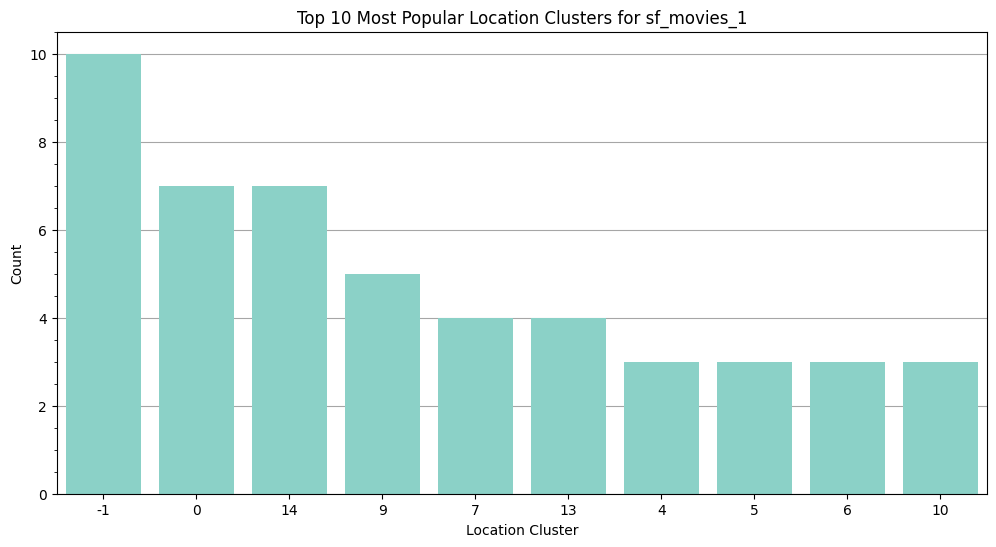

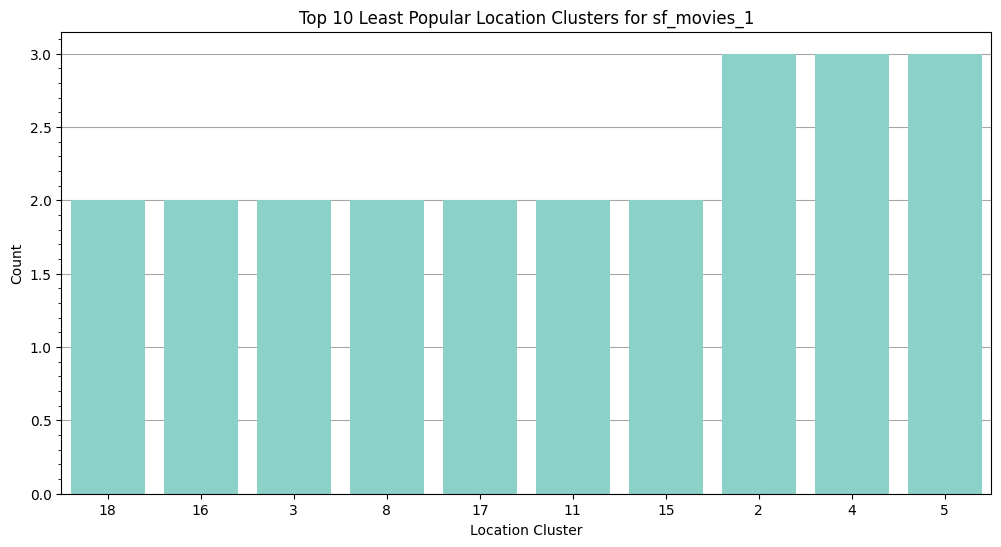

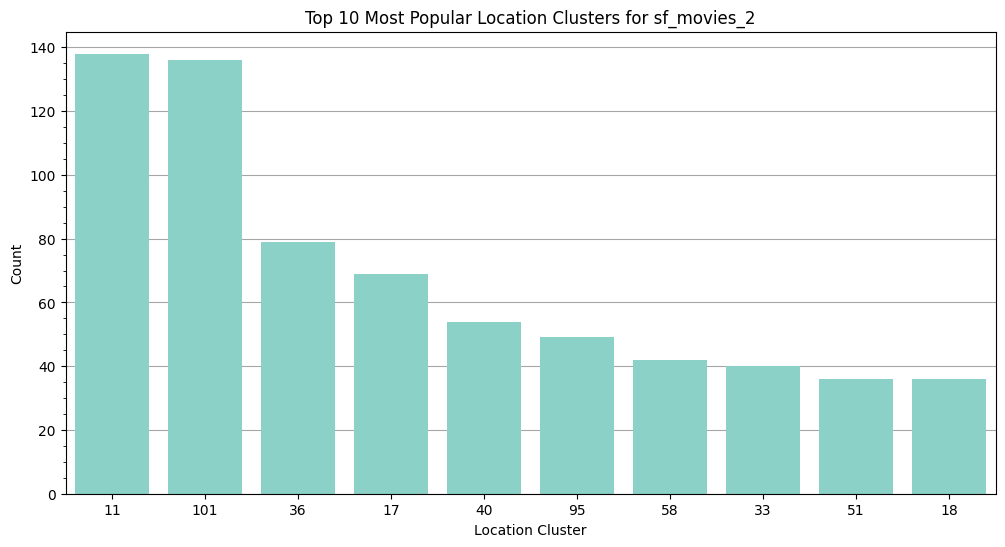

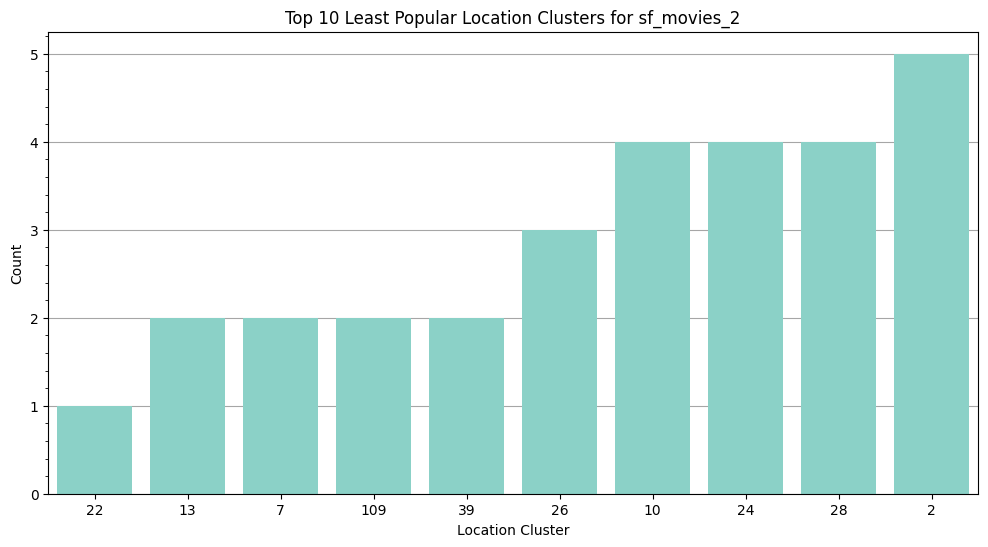

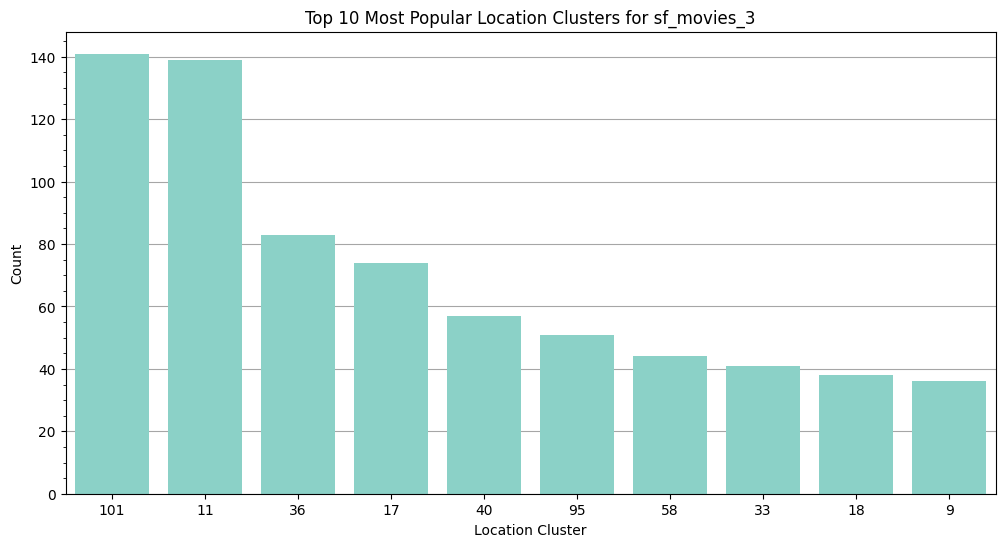

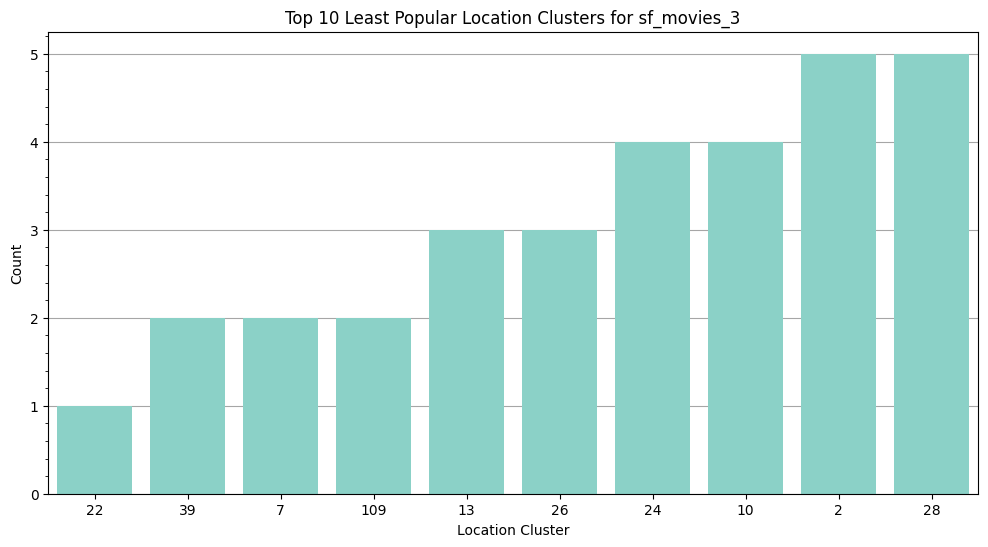

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.barplot(x=hotspots_1['location_cluster'], y=hotspots_1['count'], ax=ax, order=hotspots_1["location_cluster"],color="#7FDDCF")
ax.set_title('Top 10 Most Popular Location Clusters for sf_movies_1')
ax.set_ylabel('Count')
ax.set_xlabel('Location Cluster')
ax.set_axisbelow(True) # Ensures grid is behind bars
ax.yaxis.set_minor_locator(AutoMinorLocator()) # Adds minor ticks
ax.grid(which='major', axis='y', color='gray', alpha=0.7, linestyle='-') # Adds major grid lines
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.barplot(x=coldspots_1['location_cluster'], y=coldspots_1['count'], ax=ax, order=coldspots_1["location_cluster"], color="#7FDDCF")
ax.set_title('Top 10 Least Popular Location Clusters for sf_movies_1')
ax.set_ylabel('Count')
ax.set_xlabel('Location Cluster')
ax.set_axisbelow(True) # Ensures grid is behind bars
ax.yaxis.set_minor_locator(AutoMinorLocator()) # Adds minor ticks
ax.grid(which='major', axis='y', color='gray', alpha=0.7, linestyle='-') # Adds major grid lines
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.barplot(x=hotspots_2['location_cluster'], y=hotspots_2['count'], ax=ax, order=hotspots_2["location_cluster"], color="#7FDDCF")
ax.set_title('Top 10 Most Popular Location Clusters for sf_movies_2')
ax.set_ylabel('Count')
ax.set_xlabel('Location Cluster')
ax.set_axisbelow(True) # Ensures grid is behind bars
ax.yaxis.set_minor_locator(AutoMinorLocator()) # Adds minor ticks
ax.grid(which='major', axis='y', color='gray', alpha=0.7, linestyle='-') # Adds major grid lines
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.barplot(x=coldspots_2['location_cluster'], y=coldspots_2['count'], ax=ax, order=coldspots_2["location_cluster"], color="#7FDDCF")
ax.set_title('Top 10 Least Popular Location Clusters for sf_movies_2')
ax.set_ylabel('Count')
ax.set_xlabel('Location Cluster')
ax.set_axisbelow(True) # Ensures grid is behind bars
ax.yaxis.set_minor_locator(AutoMinorLocator()) # Adds minor ticks
ax.grid(which='major', axis='y', color='gray', alpha=0.7, linestyle='-') # Adds major grid lines
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.barplot(x=hotspots_3['location_cluster'], y=hotspots_3['count'], ax=ax, order=hotspots_3["location_cluster"], color="#7FDDCF")
ax.set_title('Top 10 Most Popular Location Clusters for sf_movies_3')
ax.set_ylabel('Count')
ax.set_xlabel('Location Cluster')
ax.set_axisbelow(True) # Ensures grid is behind bars
ax.yaxis.set_minor_locator(AutoMinorLocator()) # Adds minor ticks
ax.grid(which='major', axis='y', color='gray', alpha=0.7, linestyle='-') # Adds major grid lines
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.barplot(x=coldspots_3['location_cluster'], y=coldspots_3['count'], ax=ax, order=coldspots_3["location_cluster"], color="#7FDDCF")
ax.set_title('Top 10 Least Popular Location Clusters for sf_movies_3')
ax.set_ylabel('Count')
ax.set_xlabel('Location Cluster')
ax.set_axisbelow(True) # Ensures grid is behind bars
ax.yaxis.set_minor_locator(AutoMinorLocator()) # Adds minor ticks
ax.grid(which='major', axis='y', color='gray', alpha=0.7, linestyle='-') # Adds major grid lines
plt.show()

For sf_movies_1 (media shot in 1 location):
*   Cluster -1 is comprised of unclustered points that were not in reasonable proximity to the centroids.
*   Of the most popular production hotspots, clusters 0 (Treasure Island) and 14 (Union Square area) are tied for the top two. These are followed by clusters 9 (City Hall area), 7 (Golden Gate Bridge), and 13 (Fairmont Hotel area).
*   Of the least popular production hotspots, clusters 18 (Lower Nob Hill), 16 (Financial District), 3 (Market St. area near Duboce Triangle), 8 (Golden Gate Park), 17 (South of Market), 11 (Pier 50), and 15 (Kansas St. area, near 16th intersection) are tied for the bottom six.

For sf_movies_2 (media shot in at least 2 locations):
*   Of the most popular production hotspots, clusters 11 (Chinatown) and 101 (Financial District) are the top two, with counts of 138 and 136, respectively. Clusters 36 (Huntington Park surrounding area), 17 (City Hall area), and 40 (Fisherman's Wharf) trail behind to comprise the top 5.
*   Of the least popular production hotspots, cluster 22 (Yerba Buena Island) came in last, with a count of 1 after updates. Followed by a tie between clusters 7 (Pier 96/Heron’s Head Park), 13 (Illinois St/3rd St bridge area), 39 (Port of San Francisco and 3rd St area), 109 (Fort Funston and Lake Merced).

For sf_movies_3 (all media):
*   After combining all data and updating features for accuracy, 101 and 11 came out as the top two hotspots, with counts of 141 and 139, respectively. Followed by clusters 36, 17, 40 to make up the top 5.
*   Of the least popular, it was largely the same as those of sf_movies_2, except for the count of cluster 13 increasing to 3.

These trends indicate that Chinatown and the Financial District are the most popular production hotspots in all of San Francisco. Other prominent locations include City Hall, Fisherman's Wharf, and Huntington Park.







### 2. Decade Shifts in Productions: Determine most and least popular decades for sf_movies_1 and sf_movies_2

In [ ]:
decade_counts_1 = (sf_movies_1.groupby("release_decade")
                            .size()
                            .reset_index(name="count")
                            .sort_values("release_decade"))
print("\nNumber of Productions by Decade for sf_movies_1:")
print(decade_counts_1)

print()

decade_counts_2 = (sf_movies_2.groupby("release_decade")
                            .size()
                            .reset_index(name="count")
                            .sort_values("release_decade"))
print("\nNumber of Productions by Decade for sf_movies_2:")
print(decade_counts_2)

print()

decade_counts_3 = (sf_movies_3.groupby("release_decade")
                            .size()
                            .reset_index(name="count")
                            .sort_values("release_decade"))
print("\nNumber of Productions by Decade for sf_movies_3:")
print(decade_counts_3)


Number of Productions by Decade for sf_movies_1:
    release_decade  count
0             1920      1
1             1930      1
2             1940      3
3             1950      2
4             1960      6
5             1970      4
6             1980     14
7             1990     19
8             2000     14
9             2010      4
10            2020      1


Number of Productions by Decade for sf_movies_2:
    release_decade  count
0             1910      2
1             1920      3
2             1930      5
3             1940     13
4             1950     53
5             1960     58
6             1970    163
7             1980    113
8             1990    219
9             2000     99
10            2010    944
11            2020    243


Number of Productions by Decade for sf_movies_3:
    release_decade  count
0             1910      2
1             1920      4
2             1930      6
3             1940     16
4             1950     55
5             1960     64
6             19

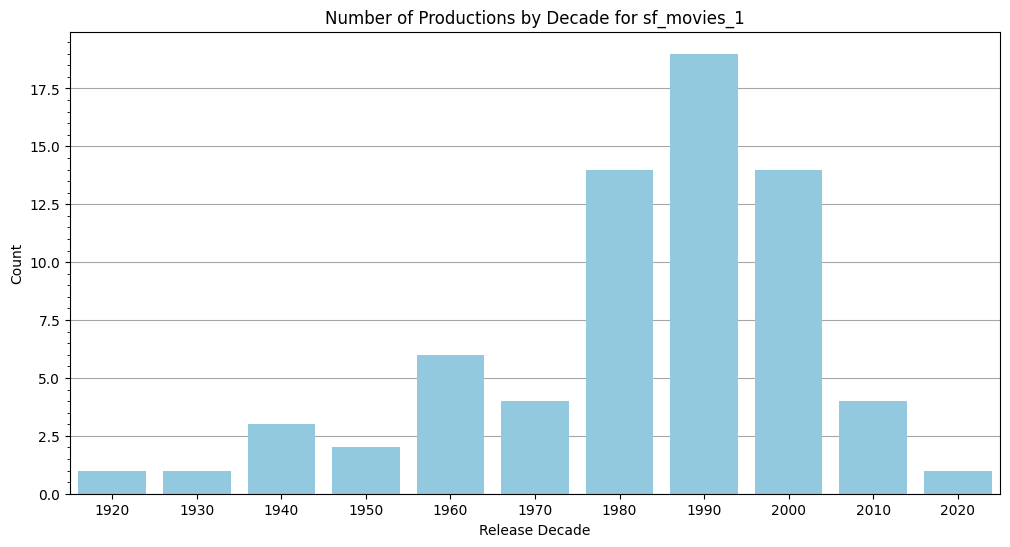

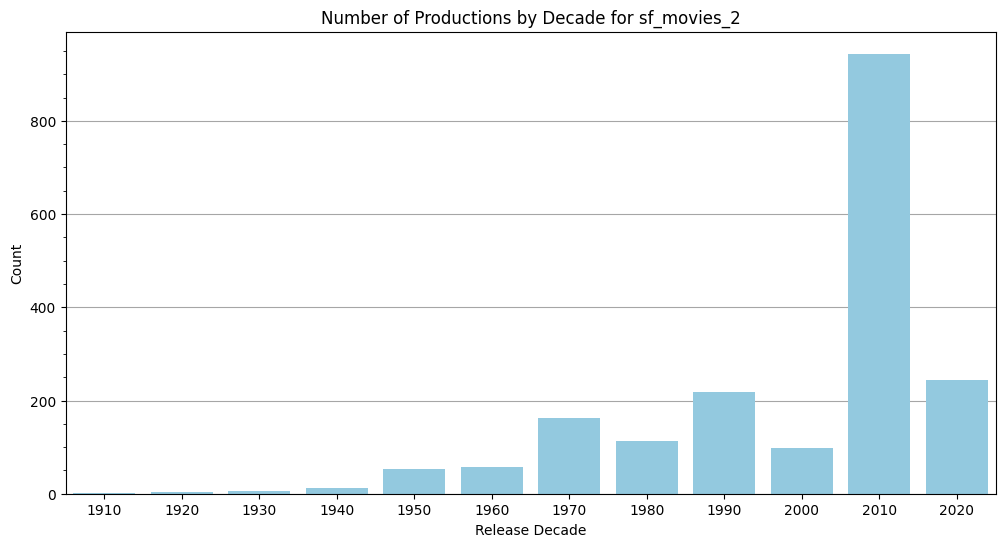

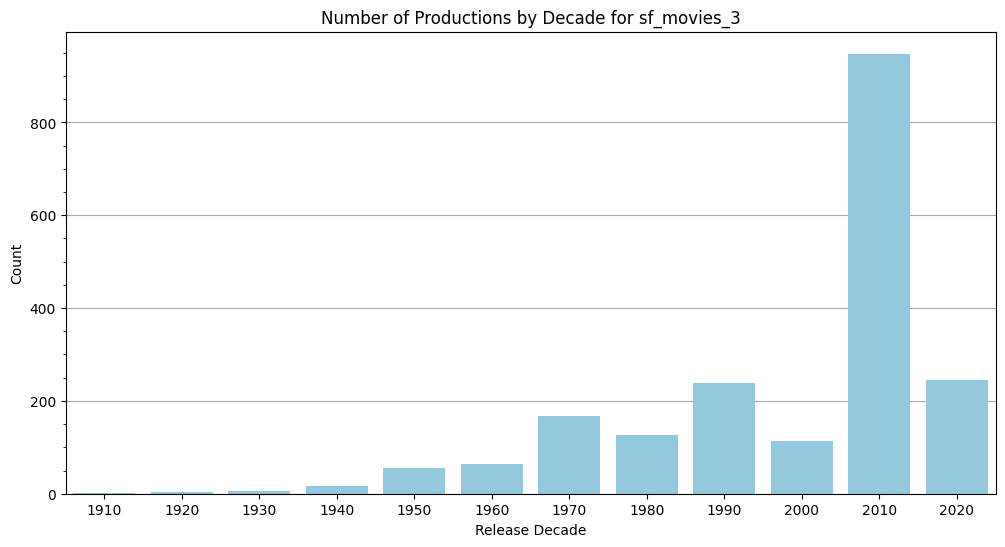

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.barplot(x=decade_counts_1['release_decade'], y=decade_counts_1['count'], ax=ax,color="#87CEEB")
ax.set_title('Number of Productions by Decade for sf_movies_1')
ax.set_ylabel('Count')
ax.set_xlabel('Release Decade')
ax.set_axisbelow(True) # Ensures grid is behind bars
ax.yaxis.set_minor_locator(AutoMinorLocator()) # Adds minor ticks
ax.grid(which='major', axis='y', color='gray', alpha=0.7, linestyle='-') # Adds major grid lines
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.barplot(x=decade_counts_2['release_decade'], y=decade_counts_2['count'], ax=ax,color="#87CEEB")
ax.set_title('Number of Productions by Decade for sf_movies_2')
ax.set_ylabel('Count')
ax.set_xlabel('Release Decade')
ax.set_axisbelow(True) # Ensures grid is behind bars
ax.yaxis.set_minor_locator(AutoMinorLocator()) # Adds minor ticks
ax.grid(which='major', axis='y', color='gray', alpha=0.7, linestyle='-') # Adds major grid lines
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.barplot(x=decade_counts_3['release_decade'], y=decade_counts_3['count'], ax=ax,color="#87CEEB")
ax.set_title('Number of Productions by Decade for sf_movies_3')
ax.set_ylabel('Count')
ax.set_xlabel('Release Decade')
ax.set_axisbelow(True) # Ensures grid is behind bars
ax.yaxis.set_minor_locator(AutoMinorLocator()) # Adds minor ticks
ax.grid(which='major', axis='y', color='gray', alpha=0.7, linestyle='-') # Adds major grid lines
plt.show()

For sf_movies_1, the 90's had the most productions shot in San Francisco. However, for sf_movies_2 and sf_movies_3, the 2010's had the largest count.

Why were there so many more films/movies shot in the 2010's compared to the 90's and 2000's?

### 3. Tourist Attraction Factor: Determine correlation between IMDb ratings and top 10 most popular clusters for sf_movies_1 and sf_movies_2

In [ ]:
# Calculate average IMDb rating per cluster in sf_movies_1:
avg_rating_1 = (
    sf_movies_1
    .groupby("location_cluster")["imdb_rating"]
    .mean()
    .reset_index(name = "avg_imdb_rating")
)

# Merge top 10 cluster counts with their average IMDb ratings:
top10_ratings_1 = hotspots_1.merge(avg_rating_1, on = "location_cluster", how = "left")
print(top10_ratings_1)

# Compute correlation between 'count' and 'avg_imdb_rating'
correlation_1 = top10_ratings_1["count"].corr(top10_ratings_1["avg_imdb_rating"])
print(f"\nCorrelation (Popularity vs. Avg IMDb Rating) for sf_movies_1's top 10 clusters: {correlation_1:.4f}")
print()

# Calculate average IMDb rating per cluster in sf_movies_2:
avg_rating_2 = (
    sf_movies_2
    .groupby("location_cluster")["imdb_rating"]
    .mean()
    .reset_index(name = "avg_imdb_rating")
)

# Merge top 10 cluster counts with their average IMDb ratings:
top10_ratings_2 = hotspots_2.merge(avg_rating_2, on = "location_cluster", how = "left")
print(top10_ratings_2)

# Compute correlation between 'count' and 'avg_imdb_rating'
correlation_2 = top10_ratings_2["count"].corr(top10_ratings_2["avg_imdb_rating"])
print(f"\nCorrelation (Popularity vs. Avg IMDb Rating) for sf_movies_2's top 10 clusters: {correlation_2:.4f}")
print()

# Calculate average IMDb rating per cluster in sf_movies_3:
avg_rating_3 = (
    sf_movies_3
    .groupby("location_cluster")["imdb_rating"]
    .mean()
    .reset_index(name = "avg_imdb_rating")
)

# Merge top 10 cluster counts with their average IMDb ratings:
top10_ratings_3 = hotspots_3.merge(avg_rating_3, on = "location_cluster", how = "left")
print(top10_ratings_3)

# Compute correlation between 'count' and 'avg_imdb_rating'
correlation_3 = top10_ratings_3["count"].corr(top10_ratings_3["avg_imdb_rating"])
print(f"\nCorrelation (Popularity vs. Avg IMDb Rating) for sf_movies_3's top 10 clusters: {correlation_3:.4f}")

   location_cluster  count  avg_imdb_rating
0                -1     10         7.140000
1                 0      7         6.714286
2                14      7         6.514286
3                 9      5         6.420000
4                 7      4         6.450000
5                13      4         6.100000
6                 4      3         6.033333
7                 5      3         6.266667
8                 6      3         6.133333
9                10      3         7.600000

Correlation (Popularity vs. Avg IMDb Rating) for sf_movies_1's top 10 clusters: 0.3830

   location_cluster  count  avg_imdb_rating
0                11    138         6.921014
1               101    136         6.648529
2                36     79         7.006329
3                17     69         6.881159
4                40     54         6.796296
5                95     49         7.136735
6                58     42         7.130952
7                33     40         6.315000
8                51     36     

Since there is neither a strong positive or negative correlation between clusters and their average IMDb ratings, I'm [skeptical] that the location hasn't made as much of an impact. This is especially true where the average IMDb ratings for clusters 101 and 11, are lower than those of some of the other popular clusters.

This makes sense given that elements like the plot, characters, actors, and genre make a larger impact than the location of a production. I wonder if more [famous] places around the world like New York City, London, and Paris would have slightly higher ratings.

### 4. Director & Writer Hotspots: Determine top 3 most-used clusters of top 5 most popular director and writer for each in sf_movies_1 and sf_movies_2

In [ ]:
# Helper function: Computes top 5 director/writer & then finds top 3 clusters for each in sf_movies_1/sf_movies_2

def get_top_clusters_by_person(df, person_col='director'):

    # Count unique clusters per person to find "top 5":
    person_cluster_counts = (
        df.groupby(person_col)['location_cluster']
          .nunique()
          .sort_values(ascending=False)
    )
    top_5 = person_cluster_counts.head(5).index.tolist()

    # For those top 5, find their top 3 clusters (count rows):
    usage_counts = (
        df.groupby([person_col, 'location_cluster'])
          .size()
          .reset_index(name='count')
    )

    top_3_dict = {}
    for person in top_5:
        person_df = usage_counts[usage_counts[person_col] == person]
        person_top_3 = person_df.sort_values('count', ascending=False).head(5)
        top_3_dict[person] = person_top_3

    return top_3_dict

# Loop through both DataFrames and print out the results:
for df_name, df in [('sf_movies_1', sf_movies_1), ('sf_movies_2', sf_movies_2), ('sf_movies_3', sf_movies_3)]:
    print(f"\n=== Results for {df_name} ===")

    # Director hotspots:
    director_top_clusters = get_top_clusters_by_person(df, person_col='director')
    print("\nTop 3 most-used clusters for top 5 directors:")
    for director, clusters_df in director_top_clusters.items():
        print(f"\nDirector: {director}")
        print(clusters_df)

    # Writer hotspots:
    writer_top_clusters = get_top_clusters_by_person(df, person_col='writer')
    print("\nTop 3 most-used clusters for top 5 writers:")
    for writer, clusters_df in writer_top_clusters.items():
        print(f"\nWriter: {writer}")
        print(clusters_df)


=== Results for sf_movies_1 ===

Top 3 most-used clusters for top 5 directors:

Director: Nicholas Meyer
          director  location_cluster  count
41  Nicholas Meyer                 7      1
42  Nicholas Meyer                 8      1

Director: Alfred Hitchcock
           director  location_cluster  count
3  Alfred Hitchcock                11      1
4  Alfred Hitchcock                14      1

Director: Paul Lazarus
        director  location_cluster  count
43  Paul Lazarus                 7      1

Director: Rob Epstein
       director  location_cluster  count
49  Rob Epstein                10      2

Director: Richard Donner
          director  location_cluster  count
48  Richard Donner                 7      1

Top 3 most-used clusters for top 5 writers:

Writer: Alan Jacobs
        writer  location_cluster  count
0  Alan Jacobs                 2      1

Writer: Paul Lazarus
          writer  location_cluster  count
44  Paul Lazarus                 7      1

Writer: Rob Epstein

For sf_movies_1:
Top directors are Nicholas Meyer, Alfred Hitchcock, Paul Lazarus, Rob Epstein, Richard Donner. Amongst them, the top location clusters are 7 (Golden Gate Bridge) and 10 (Castro and 19th St.).
Top writers are Alan Jacobs, Paul Lazarus, Rob Epstein, Richard Tuggle, Rich Eustis. Their top cluster is 2 (Ferry Building).

For sf_movies_2:
Top directors are Andrew Haigh, Steven Bochcho, Alex Garland, Jon Lucas/Scott Moore, Woody Allen. Their top clusters are 18 (Castro St. area, from 16th to 21st St.), 11 (Chinatown), 101 (Financial District), 60 (Area around 24th St. from Folsom St. to Portero Ave).
Top writers are Michael Lannan, Eric Lodal, Harry Julian Fink, Woody Allen, Jon Lucas/Scott Moore. Their top clusters are 11 (Chinatown), 101 (Financial District), 72 (Hall of Justice).

For sf_movies_3, the results do not significantly differ from those of sf_movies_2.

### 5. Media Type Hotspots: Determine top 5 location clusters for each media type (e.g. tv show, movie, etc.) in sf_movies_1 and sf_movies_2

In [ ]:
for df_name, df in [('sf_movies_1', sf_movies_1), ('sf_movies_2', sf_movies_2), ('sf_movies_3', sf_movies_3)]:
    print(f"=== Top 5 Location Clusters by Media Type: {df_name} ===")

    # Count each type, location_cluster appears:
    media_counts = (
        df.groupby(['type', 'location_cluster'])
          .size()
          .reset_index(name='count')
    )

    # For each type, select top 5 clusters:
    for media_type, group in media_counts.groupby('type'):
        group_sorted = group.sort_values('count', ascending=False)
        top_5_clusters = group_sorted.head(5)
        print(f"\nMedia Type: {media_type}")
        print(top_5_clusters)

    print("\n" + "-"*60 + "\n")

=== Top 5 Location Clusters by Media Type: sf_movies_1 ===

Media Type: documentary
          type  location_cluster  count
0  documentary                 4      1

Media Type: movie
     type  location_cluster  count
1   movie                -1      8
2   movie                 0      7
15  movie                14      7
10  movie                 9      5
8   movie                 7      4

Media Type: tv movie
        type  location_cluster  count
20  tv movie                -1      2

Media Type: tv series
         type  location_cluster  count
21  tv series                 2      1

------------------------------------------------------------

=== Top 5 Location Clusters by Media Type: sf_movies_2 ===

Media Type: episode
       type  location_cluster  count
11  episode                36      8
31  episode                64      7
2   episode                11      6
27  episode                58      5
29  episode                61      5

Media Type: movie
      type  location_clu

For sf_movies_1:

Of note, the top media type are movies and the most popular clusters for them are 0 (Treasure Island) and 14 (Union Square).

For sf_movies_2:

The top cluster for each media type: episode (36: 9 blocks surrounding Huntington Park), movie (101: Financial District), podcast episode (74: 20th & Harrison St. ), short (9: Golden Gate Park & 74: 20th & Harrison St.), tv mini series (18: Castro St. area, from 16th to 21st St.), tv movie (60: Area around 24th St. from Folsom St. to Portero Ave), tv series (101: Financial District), video movie (11: Chinatown).

Of these, the Financial District is the most popular location for shooting movies and tv series.

For sf_movies_3, the results do not significantly differ from those of sf_movies_2.
